<b><h1>A BASIC TENSORFLOW MODEL</h1> </b>
-pandas to read data

-numpy to manipulate data

-train-test-split to preprocess the data

-Sequential- Dense layer to create neural network layers

-scikit accuracy-score for knowing the prediction data's accuracy score

-seaborn to visualize

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df =  pd.read_csv("C:\\Users\\satya\\OneDrive\\Desktop\\keerthana\\ML\\Churn.csv")

In [52]:
print(df.columns)

Index(['Customer ID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')


In [53]:
df.head()

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [54]:
X = pd.get_dummies(df.drop(['Churn', 'Customer ID'], axis=1))
y = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train.head()

585     0
2794    0
364     0
6435    1
581     1
Name: Churn, dtype: int64

In [56]:
print(X_train.dtypes)
print(y_train.dtypes)


Senior Citizen            int64
tenure                    int64
Monthly Charges         float64
Gender_Female              bool
Gender_Male                bool
                         ...   
Total Charges_997.75       bool
Total Charges_998.1        bool
Total Charges_999.45       bool
Total Charges_999.8        bool
Total Charges_999.9        bool
Length: 6575, dtype: object
int64


In [57]:
X_train = X_train.astype('float32')
y_train = y_train.astype('int32')

In [58]:
print(X_train.isna().sum())  # Check for missing values
X_train = X_train.fillna(0)  # Replace NaN values with 0 (or another strategy)

# Check for infinite values
import numpy as np
X_train = np.nan_to_num(X_train)


Senior Citizen          0
tenure                  0
Monthly Charges         0
Gender_Female           0
Gender_Male             0
                       ..
Total Charges_997.75    0
Total Charges_998.1     0
Total Charges_999.45    0
Total Charges_999.8     0
Total Charges_999.9     0
Length: 6575, dtype: int64


In [76]:
X_test = X_test.to_numpy() if hasattr(X_test, 'to_numpy') else X_test

X_test = X_test.astype('float32')

import numpy as np
X_test = np.nan_to_num(X_test)

In [59]:
print(X_train.shape)
print(X_train.dtype)
print(y_train.shape)
print(y_train.dtype)

(5635, 6575)
float32
(5635,)
int32


In [71]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [63]:
model = Sequential()
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [65]:
model.compile(loss='binary_crossentropy', optimizer='sgd',metrics=["accuracy"])

In [67]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7958 - loss: 0.4252
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7921 - loss: 0.4289
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7935 - loss: 0.4259
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7980 - loss: 0.4267
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8011 - loss: 0.4211
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7984 - loss: 0.4236
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7973 - loss: 0.4260
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7993 - loss: 0.4174
Epoch 9/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8001 - loss: 0.4184
Epoch 10/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7921 - loss: 0.4296
Epoch 11/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7986 - loss: 0.4226
Epoch 12/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [98]:
y_hat = model.predict(X_test).flatten()

results = pd.DataFrame({
    'true labels': y_test,
    'predicted labels':[0 if val < 0.5 else 1 for val in y_hat]
})


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


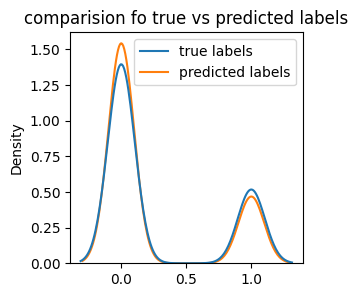

In [120]:
fig = plt.figure(figsize=(3,3))
sns.kdeplot (data=results)
plt.title("comparision fo true vs predicted labels")
plt.show()

In [121]:
accuracy = accuracy_score(y_test, results['predicted labels'])
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8077


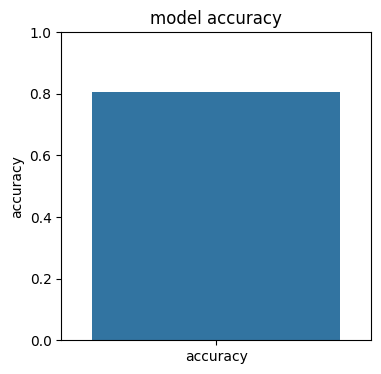

In [144]:
fig = plt.figure(figsize=(4,4))
sns.barplot(x=['accuracy'], y=[accuracy])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.ylim(0, 1)
plt.show()

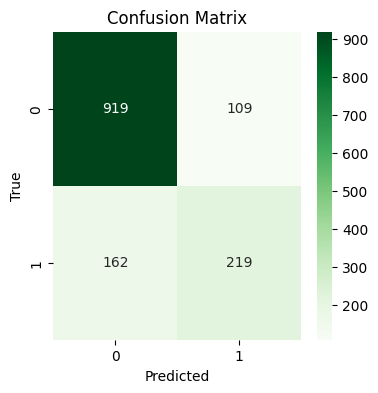

In [143]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, results['predicted labels'])

fig = plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['0', '1'], yticklabels=['0','1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()